In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.metrics import accuracy_score

part1

In [29]:
cats = pd.read_csv("C:/Users/acer/Desktop/HW3_ML_9823033/cats.csv")
cats

,rownames,Gender,Bwt,Hwt
0,1,F,2.0,7.0
1,2,F,2.0,7.4
2,3,F,2.0,9.5
3,4,F,2.1,7.2
4,5,F,2.1,7.3
...,...,...,...,...
139,140,M,3.7,11.0
140,141,M,3.8,14.8
141,142,M,3.8,16.8
142,143,M,3.9,14.4


In [30]:
cats = cats.drop(columns=['rownames'])
cats

,Gender,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3
...,...,...,...
139,M,3.7,11.0
140,M,3.8,14.8
141,M,3.8,16.8
142,M,3.9,14.4


In [31]:
le = LabelEncoder()
label = le.fit_transform(cats['Gender'])
cats.drop("Gender", axis=1, inplace=True)
cats["Gender"] = label
cats

,Bwt,Hwt,Gender
0,2.0,7.0,0
1,2.0,7.4,0
2,2.0,9.5,0
3,2.1,7.2,0
4,2.1,7.3,0
...,...,...,...
139,3.7,11.0,1
140,3.8,14.8,1
141,3.8,16.8,1
142,3.9,14.4,1


In [32]:
x_cats = cats.drop(columns=['Gender']).to_numpy()
y_cats = cats['Gender'].to_numpy().reshape(-1, 1)

#train test split
x_train, x_test, y_train, y_test = train_test_split(x_cats, y_cats, test_size=0.2)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((115, 2), (115, 1), (29, 2), (29, 1))

part2

Text(0.5, 1.0, 'visualizing data')

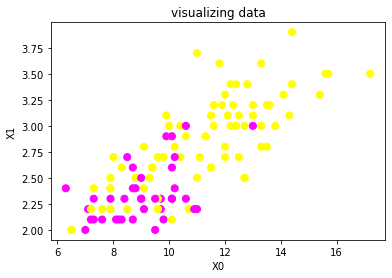

In [33]:
plt.scatter(x_train[:,1], x_train[:,0], c=y_train, s=50, cmap='spring');
plt.xlabel("X0")
plt.ylabel("X1")
plt.title('visualizing data')

In [70]:
x_cats_train = StandardScaler().fit_transform(x_train)

Text(0.5, 1.0, 'visualizing data')

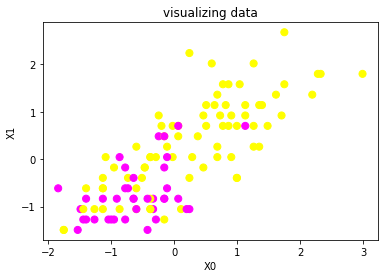

In [71]:
plt.scatter(x_cats_train[:,1], x_cats_train[:,0], c=y_train, s=50, cmap='spring')
plt.xlabel("X0")
plt.ylabel("X1")
plt.title('visualizing data')

part3

In [36]:
C = np.logspace(-2.0, 5.0, num=8)
C

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05])

In [37]:
Gamma = np.logspace(-6.0, 1.0, num=16)
Gamma

array([1.00000000e-06, 2.92864456e-06, 8.57695899e-06, 2.51188643e-05,
       7.35642254e-05, 2.15443469e-04, 6.30957344e-04, 1.84784980e-03,
       5.41169527e-03, 1.58489319e-02, 4.64158883e-02, 1.35935639e-01,
       3.98107171e-01, 1.16591440e+00, 3.41454887e+00, 1.00000000e+01])

part4

In [39]:
param_grid = {'C': np.logspace(-2.0, 5.0, num=8),  
              'gamma': np.logspace(-6.0, 1.0, num=16)}  
  
grid = GridSearchCV(SVC(kernel='linear'), param_grid, refit = True, verbose = 3 , cv=5) 
   
grid.fit(x_cats_train, y_train.ravel()) 

print(grid.best_params_) 
  

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV 1/5] END ...............C=0.01, gamma=1e-06;, score=0.696 total time=   0.0s
[CV 2/5] END ...............C=0.01, gamma=1e-06;, score=0.696 total time=   0.0s
[CV 3/5] END ...............C=0.01, gamma=1e-06;, score=0.652 total time=   0.0s
[CV 4/5] END ...............C=0.01, gamma=1e-06;, score=0.652 total time=   0.0s
[CV 5/5] END ...............C=0.01, gamma=1e-06;, score=0.652 total time=   0.0s
[CV 1/5] END C=0.01, gamma=2.9286445646252375e-06;, score=0.696 total time=   0.0s
[CV 2/5] END C=0.01, gamma=2.9286445646252375e-06;, score=0.696 total time=   0.0s
[CV 3/5] END C=0.01, gamma=2.9286445646252375e-06;, score=0.652 total time=   0.0s
[CV 4/5] END C=0.01, gamma=2.9286445646252375e-06;, score=0.652 total time=   0.0s
[CV 5/5] END C=0.01, gamma=2.9286445646252375e-06;, score=0.652 total time=   0.0s
[CV 1/5] END C=0.01, gamma=8.576958985908945e-06;, score=0.696 total time=   0.0s
[CV 2/5] END C=0.01, gamma=8.576958

[CV 4/5] END C=0.1, gamma=0.0054116952654646375;, score=0.652 total time=   0.0s
[CV 5/5] END C=0.1, gamma=0.0054116952654646375;, score=0.739 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01584893192461114;, score=0.870 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01584893192461114;, score=0.652 total time=   0.0s
[CV 3/5] END ..C=0.1, gamma=0.01584893192461114;, score=0.652 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=0.01584893192461114;, score=0.652 total time=   0.0s
[CV 5/5] END ..C=0.1, gamma=0.01584893192461114;, score=0.739 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.04641588833612782;, score=0.870 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.04641588833612782;, score=0.652 total time=   0.0s
[CV 3/5] END ..C=0.1, gamma=0.04641588833612782;, score=0.652 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=0.04641588833612782;, score=0.652 total time=   0.0s
[CV 5/5] END ..C=0.1, gamma=0.04641588833612782;, score=0.739 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma

[CV 3/5] END ....C=1.0, gamma=3.414548873833601;, score=0.826 total time=   0.0s
[CV 4/5] END ....C=1.0, gamma=3.414548873833601;, score=0.652 total time=   0.0s
[CV 5/5] END ....C=1.0, gamma=3.414548873833601;, score=0.826 total time=   0.0s
[CV 1/5] END .................C=1.0, gamma=10.0;, score=0.870 total time=   0.0s
[CV 2/5] END .................C=1.0, gamma=10.0;, score=0.652 total time=   0.0s
[CV 3/5] END .................C=1.0, gamma=10.0;, score=0.826 total time=   0.0s
[CV 4/5] END .................C=1.0, gamma=10.0;, score=0.652 total time=   0.0s
[CV 5/5] END .................C=1.0, gamma=10.0;, score=0.826 total time=   0.0s
[CV 1/5] END ...............C=10.0, gamma=1e-06;, score=0.870 total time=   0.0s
[CV 2/5] END ...............C=10.0, gamma=1e-06;, score=0.652 total time=   0.0s
[CV 3/5] END ...............C=10.0, gamma=1e-06;, score=0.826 total time=   0.0s
[CV 4/5] END ...............C=10.0, gamma=1e-06;, score=0.652 total time=   0.0s
[CV 5/5] END ...............

[CV 3/5] END C=100.0, gamma=2.5118864315095822e-05;, score=0.826 total time=   0.0s
[CV 4/5] END C=100.0, gamma=2.5118864315095822e-05;, score=0.652 total time=   0.0s
[CV 5/5] END C=100.0, gamma=2.5118864315095822e-05;, score=0.826 total time=   0.0s
[CV 1/5] END C=100.0, gamma=7.356422544596421e-05;, score=0.870 total time=   0.0s
[CV 2/5] END C=100.0, gamma=7.356422544596421e-05;, score=0.652 total time=   0.0s
[CV 3/5] END C=100.0, gamma=7.356422544596421e-05;, score=0.826 total time=   0.0s
[CV 4/5] END C=100.0, gamma=7.356422544596421e-05;, score=0.652 total time=   0.0s
[CV 5/5] END C=100.0, gamma=7.356422544596421e-05;, score=0.826 total time=   0.0s
[CV 1/5] END C=100.0, gamma=0.00021544346900318845;, score=0.870 total time=   0.0s
[CV 2/5] END C=100.0, gamma=0.00021544346900318845;, score=0.652 total time=   0.0s
[CV 3/5] END C=100.0, gamma=0.00021544346900318845;, score=0.826 total time=   0.0s
[CV 4/5] END C=100.0, gamma=0.00021544346900318845;, score=0.652 total time=   0.

[CV 3/5] END C=1000.0, gamma=0.1359356390878527;, score=0.870 total time=   0.0s
[CV 4/5] END C=1000.0, gamma=0.1359356390878527;, score=0.652 total time=   0.0s
[CV 5/5] END C=1000.0, gamma=0.1359356390878527;, score=0.826 total time=   0.0s
[CV 1/5] END C=1000.0, gamma=0.3981071705534969;, score=0.913 total time=   0.0s
[CV 2/5] END C=1000.0, gamma=0.3981071705534969;, score=0.652 total time=   0.0s
[CV 3/5] END C=1000.0, gamma=0.3981071705534969;, score=0.870 total time=   0.0s
[CV 4/5] END C=1000.0, gamma=0.3981071705534969;, score=0.652 total time=   0.0s
[CV 5/5] END C=1000.0, gamma=0.3981071705534969;, score=0.826 total time=   0.0s
[CV 1/5] END .C=1000.0, gamma=1.165914401179831;, score=0.913 total time=   0.0s
[CV 2/5] END .C=1000.0, gamma=1.165914401179831;, score=0.652 total time=   0.0s
[CV 3/5] END .C=1000.0, gamma=1.165914401179831;, score=0.870 total time=   0.0s
[CV 4/5] END .C=1000.0, gamma=1.165914401179831;, score=0.652 total time=   0.0s
[CV 5/5] END .C=1000.0, gamm

[CV 3/5] END .............C=10000.0, gamma=10.0;, score=0.826 total time=   0.9s
[CV 4/5] END .............C=10000.0, gamma=10.0;, score=0.652 total time=   0.5s
[CV 5/5] END .............C=10000.0, gamma=10.0;, score=0.826 total time=   0.0s
[CV 1/5] END ...........C=100000.0, gamma=1e-06;, score=0.913 total time=   1.7s
[CV 2/5] END ...........C=100000.0, gamma=1e-06;, score=0.652 total time=   4.0s
[CV 3/5] END ...........C=100000.0, gamma=1e-06;, score=0.826 total time=   0.9s
[CV 4/5] END ...........C=100000.0, gamma=1e-06;, score=0.609 total time=   1.5s
[CV 5/5] END ...........C=100000.0, gamma=1e-06;, score=0.826 total time=   0.5s
[CV 1/5] END C=100000.0, gamma=2.9286445646252375e-06;, score=0.913 total time=   3.5s
[CV 2/5] END C=100000.0, gamma=2.9286445646252375e-06;, score=0.652 total time=   2.3s
[CV 3/5] END C=100000.0, gamma=2.9286445646252375e-06;, score=0.826 total time=   1.0s
[CV 4/5] END C=100000.0, gamma=2.9286445646252375e-06;, score=0.609 total time=   1.7s
[CV 

In [53]:
opt_svm_model_linear = SVC(C=1000.0, gamma=1e-06, kernel='linear')

opt_svm_model_linear.fit(x_cats_train, y_train.ravel()) 
y_train_predic_linear = opt_svm_model_linear.predict(x_cats_train) 

print('accuracy on train', accuracy_score(y_train,y_train_predic_linear))

print(classification_report(y_train.ravel(), y_train_predic_linear))

accuracy on train 0.782608695652174
              precision    recall  f1-score   support

           0       0.68      0.66      0.67        38
           1       0.83      0.84      0.84        77

    accuracy                           0.78       115
   macro avg       0.75      0.75      0.75       115
weighted avg       0.78      0.78      0.78       115



part5

In [41]:
param_grid = {'C': np.logspace(-2.0, 5.0, num=8),  
              'gamma': np.logspace(-6.0, 1.0, num=16)}  
  
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, refit = True, verbose = 3 , cv=5) 
   
grid.fit(x_cats_train, y_train.ravel()) 

print(grid.best_params_) 
  

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV 1/5] END ...............C=0.01, gamma=1e-06;, score=0.696 total time=   0.0s
[CV 2/5] END ...............C=0.01, gamma=1e-06;, score=0.696 total time=   0.0s
[CV 3/5] END ...............C=0.01, gamma=1e-06;, score=0.652 total time=   0.0s
[CV 4/5] END ...............C=0.01, gamma=1e-06;, score=0.652 total time=   0.0s
[CV 5/5] END ...............C=0.01, gamma=1e-06;, score=0.652 total time=   0.0s
[CV 1/5] END C=0.01, gamma=2.9286445646252375e-06;, score=0.696 total time=   0.0s
[CV 2/5] END C=0.01, gamma=2.9286445646252375e-06;, score=0.696 total time=   0.0s
[CV 3/5] END C=0.01, gamma=2.9286445646252375e-06;, score=0.652 total time=   0.0s
[CV 4/5] END C=0.01, gamma=2.9286445646252375e-06;, score=0.652 total time=   0.0s
[CV 5/5] END C=0.01, gamma=2.9286445646252375e-06;, score=0.652 total time=   0.0s
[CV 1/5] END C=0.01, gamma=8.576958985908945e-06;, score=0.696 total time=   0.0s
[CV 2/5] END C=0.01, gamma=8.576958

[CV 2/5] END C=0.1, gamma=0.00021544346900318845;, score=0.696 total time=   0.0s
[CV 3/5] END C=0.1, gamma=0.00021544346900318845;, score=0.652 total time=   0.0s
[CV 4/5] END C=0.1, gamma=0.00021544346900318845;, score=0.652 total time=   0.0s
[CV 5/5] END C=0.1, gamma=0.00021544346900318845;, score=0.652 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=0.000630957344480193;, score=0.696 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=0.000630957344480193;, score=0.696 total time=   0.0s
[CV 3/5] END .C=0.1, gamma=0.000630957344480193;, score=0.652 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=0.000630957344480193;, score=0.652 total time=   0.0s
[CV 5/5] END .C=0.1, gamma=0.000630957344480193;, score=0.652 total time=   0.0s
[CV 1/5] END C=0.1, gamma=0.0018478497974222907;, score=0.696 total time=   0.0s
[CV 2/5] END C=0.1, gamma=0.0018478497974222907;, score=0.696 total time=   0.0s
[CV 3/5] END C=0.1, gamma=0.0018478497974222907;, score=0.652 total time=   0.0s
[CV 4/5] END C=0.1, gamm

[CV 3/5] END ..C=1.0, gamma=0.01584893192461114;, score=0.652 total time=   0.0s
[CV 4/5] END ..C=1.0, gamma=0.01584893192461114;, score=0.652 total time=   0.0s
[CV 5/5] END ..C=1.0, gamma=0.01584893192461114;, score=0.652 total time=   0.0s
[CV 1/5] END ..C=1.0, gamma=0.04641588833612782;, score=0.783 total time=   0.0s
[CV 2/5] END ..C=1.0, gamma=0.04641588833612782;, score=0.609 total time=   0.0s
[CV 3/5] END ..C=1.0, gamma=0.04641588833612782;, score=0.652 total time=   0.0s
[CV 4/5] END ..C=1.0, gamma=0.04641588833612782;, score=0.696 total time=   0.0s
[CV 5/5] END ..C=1.0, gamma=0.04641588833612782;, score=0.739 total time=   0.0s
[CV 1/5] END ...C=1.0, gamma=0.1359356390878527;, score=0.870 total time=   0.0s
[CV 2/5] END ...C=1.0, gamma=0.1359356390878527;, score=0.652 total time=   0.0s
[CV 3/5] END ...C=1.0, gamma=0.1359356390878527;, score=0.826 total time=   0.0s
[CV 4/5] END ...C=1.0, gamma=0.1359356390878527;, score=0.652 total time=   0.0s
[CV 5/5] END ...C=1.0, gamma

[CV 1/5] END C=1000.0, gamma=8.576958985908945e-06;, score=0.696 total time=   0.0s
[CV 2/5] END C=1000.0, gamma=8.576958985908945e-06;, score=0.696 total time=   0.0s
[CV 3/5] END C=1000.0, gamma=8.576958985908945e-06;, score=0.652 total time=   0.0s
[CV 4/5] END C=1000.0, gamma=8.576958985908945e-06;, score=0.652 total time=   0.0s
[CV 5/5] END C=1000.0, gamma=8.576958985908945e-06;, score=0.652 total time=   0.0s
[CV 1/5] END C=1000.0, gamma=2.5118864315095822e-05;, score=0.696 total time=   0.0s
[CV 2/5] END C=1000.0, gamma=2.5118864315095822e-05;, score=0.652 total time=   0.0s
[CV 3/5] END C=1000.0, gamma=2.5118864315095822e-05;, score=0.652 total time=   0.0s
[CV 4/5] END C=1000.0, gamma=2.5118864315095822e-05;, score=0.609 total time=   0.0s
[CV 5/5] END C=1000.0, gamma=2.5118864315095822e-05;, score=0.609 total time=   0.0s
[CV 1/5] END C=1000.0, gamma=7.356422544596421e-05;, score=0.870 total time=   0.0s
[CV 2/5] END C=1000.0, gamma=7.356422544596421e-05;, score=0.652 total 

[CV 3/5] END C=10000.0, gamma=0.1359356390878527;, score=0.826 total time=   0.0s
[CV 4/5] END C=10000.0, gamma=0.1359356390878527;, score=0.652 total time=   0.0s
[CV 5/5] END C=10000.0, gamma=0.1359356390878527;, score=0.696 total time=   0.0s
[CV 1/5] END C=10000.0, gamma=0.3981071705534969;, score=0.826 total time=   0.0s
[CV 2/5] END C=10000.0, gamma=0.3981071705534969;, score=0.609 total time=   0.0s
[CV 3/5] END C=10000.0, gamma=0.3981071705534969;, score=0.739 total time=   0.0s
[CV 4/5] END C=10000.0, gamma=0.3981071705534969;, score=0.609 total time=   0.0s
[CV 5/5] END C=10000.0, gamma=0.3981071705534969;, score=0.783 total time=   0.0s
[CV 1/5] END C=10000.0, gamma=1.165914401179831;, score=0.783 total time=   0.0s
[CV 2/5] END C=10000.0, gamma=1.165914401179831;, score=0.652 total time=   0.0s
[CV 3/5] END C=10000.0, gamma=1.165914401179831;, score=0.696 total time=   0.0s
[CV 4/5] END C=10000.0, gamma=1.165914401179831;, score=0.696 total time=   0.0s
[CV 5/5] END C=10000

In [55]:
opt_svm_model_rbf = SVC(C=10.0, gamma=0.1359356390878527, kernel='rbf')

opt_svm_model_rbf.fit(x_cats_train, y_train.ravel()) 
y_train_predic_rbf = opt_svm_model_rbf.predict(x_cats_train) 

print('accuracy on train', accuracy_score(y_train,y_train_predic_rbf))

print(classification_report(y_train.ravel(), y_train_predic_rbf))

accuracy on train 0.8
              precision    recall  f1-score   support

           0       0.68      0.74      0.71        38
           1       0.86      0.83      0.85        77

    accuracy                           0.80       115
   macro avg       0.77      0.78      0.78       115
weighted avg       0.80      0.80      0.80       115



part6

In [56]:
x_cats_test = StandardScaler().fit_transform(x_test)

y_test_predic_rbf = opt_svm_model_rbf.predict(x_cats_test)

print('accuracy on test', accuracy_score(y_test,y_test_predic_rbf))

print(classification_report(y_test.ravel(), y_test_predic_rbf))

accuracy on test 0.7931034482758621
              precision    recall  f1-score   support

           0       0.64      0.78      0.70         9
           1       0.89      0.80      0.84        20

    accuracy                           0.79        29
   macro avg       0.76      0.79      0.77        29
weighted avg       0.81      0.79      0.80        29



In [60]:
#opt_svm_model_linear.fit(x_cats_test, y_test.ravel())
#y_test_predic_linear = opt_svm_model_linear.predict(x_cats_test) 
#print('accuracy on test', accuracy_score(y_test,y_test_predic_linear))
#print(classification_report(y_test.ravel(), y_test_predic_linear))

depicting decision boundry and margin

In [58]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    #if plot_support:
    #    ax.scatter(model.support_vectors_[:, 0],
    #               model.support_vectors_[:, 1],
    #               s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

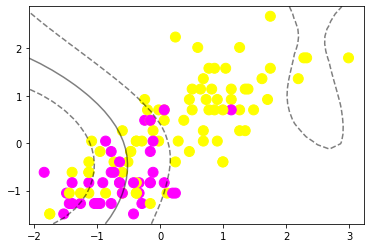

In [59]:
#decision boundry on trainset

plt.scatter(x_cats_train[:,1], x_cats_train[:,0], c=y_train, s=100, cmap='spring')
plot_svc_decision_function(opt_svm_model_rbf)

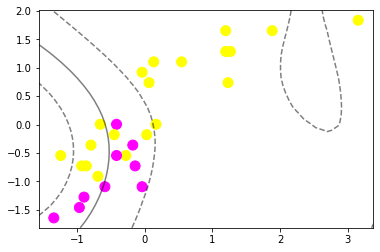

In [62]:
#decision boundry on test set

plt.scatter(x_cats_test[:,1], x_cats_test[:,0], c=y_test, s=100, cmap='spring')
plot_svc_decision_function(opt_svm_model_rbf)

In [63]:
#plt.scatter(x_cats_train[:,1], x_cats_train[:,0], c=y_train, s=100, cmap='spring')
#plot_svc_decision_function(opt_svm_model_linear)